# Example image recognition cifar10

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# import cv2
import IPython
# from six.moves import urllib

print(tf.__version__)

2.11.0


In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# reshape images to specify that it's a single channel
train_images = train_images.reshape(train_images.shape[0], 32, 32, 3)
test_images = test_images.reshape(test_images.shape[0], 32, 32, 3)

In [4]:
def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(32, 32, 3), (32, 32)], sample_img.shape # make sure images are 32x32 and single-channel (grayscale)
    return imgs / 255.0

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

<Figure size 1000x200 with 0 Axes>

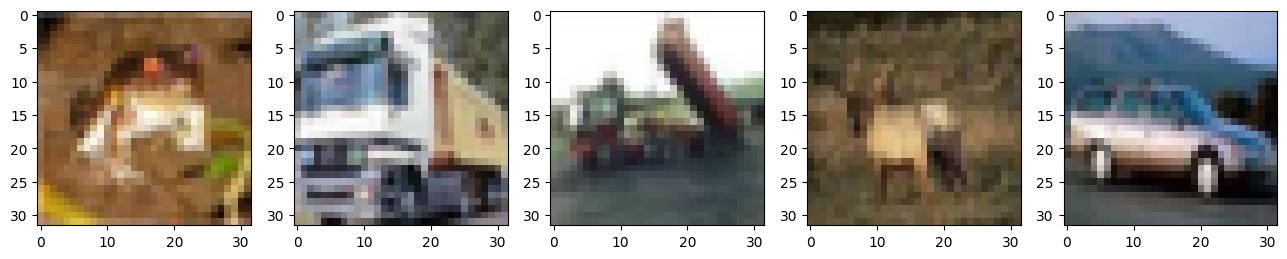

In [8]:
plt.figure(figsize=(10,2))
f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)
for i in range(5):
    img = train_images[i]
    axarr[i].imshow(img)
plt.show()

In [9]:
model = keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
# one more dropout
model.add(Dropout(0.5))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 129s 82ms/step - loss: 1.5424 - accuracy: 0.4410
Epoch 2/5
1563/1563 [==============================] - 121s 77ms/step - loss: 1.2185 - accuracy: 0.5696
Epoch 3/5
1563/1563 [==============================] - 122s 78ms/step - loss: 1.1031 - accuracy: 0.6099
Epoch 4/5
1563/1563 [==============================] - 120s 77ms/step - loss: 1.0275 - accuracy: 0.6356
Epoch 5/5
1563/1563 [==============================] - 121s 77ms/step - loss: 0.9580 - accuracy: 0.6609


In [12]:
model.save('final.h5')

In [34]:
from numpy import argmax
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model

cifar10_labels = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])
 
# load and prepare the image
def load_image(filename):
 # load the image
 img = load_img(filename, grayscale=True, target_size=(32, 32))
 # convert to array
 img = img_to_array(img)
 # reshape into a single sample with 1 channel
 #  img = img.reshape(-1, 32, 32, 3)
 # prepare pixel data
 img = img.astype('float32')
 img = img / 255.0
 c = np.zeros(32*32*3).reshape((1,32,32,3))
 c[0] = img
 return c
 
# load an image and predict the class
def run_example():
    # load the image
    img = load_image('bird.png')
    # predict the class
    res = model.predict(img)
    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < res[0][n]:
            bestnum = res[0][n]
            bestclass = n
    #  digit = argmax(predict_value)
    print(cifar10_labels[bestclass])
 
# entry point, run the example
run_example()

1/1 [==============================] - 0s 32ms/step
bird


c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(
